In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import os

# Load sweep_summary.txt

In [3]:
# folder where all simulations are stored
sim_root = '/Users/alvarok/morpheus/'

# folder where sweep results are stored (subfolder of sim_root)
sweep_folder = 'Toggle-Switch_sweep_1'
# read sweep_summary into dataframe
df = pd.read_csv(os.path.join(sim_root, sweep_folder, 'sweep_data.csv'), sep='\t')
# show first lines of dataframe
df.head(11)

Folder   P1
0   Toggle-Switch_sweep_1/Toggle-Switch_301  1.0
1   Toggle-Switch_sweep_1/Toggle-Switch_302  1.2
2   Toggle-Switch_sweep_1/Toggle-Switch_303  1.4
3   Toggle-Switch_sweep_1/Toggle-Switch_304  1.6
4   Toggle-Switch_sweep_1/Toggle-Switch_305  1.8
5   Toggle-Switch_sweep_1/Toggle-Switch_306  2.0
6   Toggle-Switch_sweep_1/Toggle-Switch_307  2.2
7   Toggle-Switch_sweep_1/Toggle-Switch_308  2.4
8   Toggle-Switch_sweep_1/Toggle-Switch_309  2.6
9   Toggle-Switch_sweep_1/Toggle-Switch_310  2.8
10  Toggle-Switch_sweep_1/Toggle-Switch_311  3.0

# Read data from logger.txt files

In [4]:
def get_data(folder):
    # filename
    fn = os.path.join(sim_root, folder, 'logger.csv')
    # get data into dataframe
    df_temp = pd.read_csv(fn, sep='\t')
    # get time at end of logtime
    maxtime = df_temp['time'].max() 
    # get x,y values of last time step
    df_temp = df_temp[df_temp['time'] == maxtime]
    # return x,y values as numpy array
    return df_temp[['u', 'v']].values[0]

results = []
# for each row in the dataframe
for i, row in df.iterrows():
    # get the folder
    folder = row['Folder']
    # get parameter value
    parameter = row['P1']
    # get data from logger.txt (see above)
    data = get_data(folder)
    # add to results list
    results.append( [parameter, data[0], data[1]] )

# convert results list to pandas dataframe
df_results = pd.DataFrame(results, columns=['a1', 'u', 'v'])
# show first lines of dataframe
df_results.head(10)

a1         u         v
0  1.0  0.111766  1.997089
1  1.2  0.134037  1.995470
2  1.4  0.157009  1.992558
3  1.6  0.180414  1.988452
4  1.8  0.204422  1.983187
5  2.0  0.231394  1.974142
6  2.2  2.188340  0.174287
7  2.4  2.393905  0.135948
8  2.6  2.596634  0.108135
9  2.8  2.798080  0.087240

# Plot data

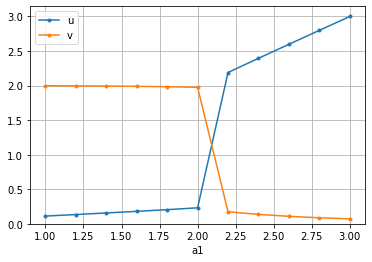

In [5]:
# plot x vs a1
plt.plot(df_results['a1'], df_results['u'], '.-', label='u')
# plot y vs a1
plt.plot(df_results['a1'], df_results['v'], '.-', label='v')
plt.xlabel('a1')
plt.grid()
plt.ylim(bottom=0)
plt.legend()